In [1]:
# Python Standard Libraries for importing data from binary file
import os.path #for accessing the file path
import struct  #for unpacking the binary data

import time    #for calculating time
import math    #for using floor in creating minibatches


#core packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Ellipse


#custom module
from dataPrep import load_dataset, load_sample_dataset
from dataPrep import prep_dataset, rand_mini_batches

from finalModelUtils import *
from ffnn import *

np.random.seed(1)
%matplotlib inline

In [2]:
#loading complete dataset
train_x_orig, train_y_orig, dev_x_orig,dev_y_orig,test_x_orig,test_y_orig = load_dataset()

In [3]:
#loading Sample dataset
sample_size = 25
train_x_sample, train_y_sample, dev_x_sample, dev_y_sample, test_x_sample, test_y_sample = load_sample_dataset(sample_size)

print("Sample Size : %d%%\n"%(sample_size))
print("Data\t\t\t","Complete Dataset\t","Sample Dataset\t")
print("================================================================")
print("Training Set Images:\t"+ str(train_x_orig.shape)+"\t\t"+ str(train_x_sample.shape))
print("Training Set Labels:\t"+ str(train_y_orig.shape)+"\t\t"+ str(train_y_sample.shape))
print("Training Set Images:\t"+ str(dev_x_orig.shape)+"\t\t"+ str(dev_x_sample.shape))
print("Training Set Labels:\t"+ str(dev_y_orig.shape)+"\t\t"+ str(dev_y_sample.shape))
print("Test Set Images:\t"+str(test_x_orig.shape)+"\t\t"+ str(test_x_sample.shape))
print("Test Set Labels:\t"+str(test_y_orig.shape)+"\t\t"+ str(test_y_sample.shape))
print("================================================================")


Sample Size : 25%

Data			 Complete Dataset	 Sample Dataset	
Training Set Images:	(60000, 28, 28)		(15000, 28, 28)
Training Set Labels:	(60000, 1)		(15000, 1)
Training Set Images:	(5000, 28, 28)		(1250, 28, 28)
Training Set Labels:	(5000, 1)		(1250, 1)
Test Set Images:	(5000, 28, 28)		(1250, 28, 28)
Test Set Labels:	(5000, 1)		(1250, 1)


In [4]:
# Preparing the Dataset (Flattening and Normalizing)
train_x_norm,train_y_encoded, dev_x_norm,dev_y_encoded, test_x_norm, test_y_encoded = prep_dataset(train_x_sample, train_y_sample, dev_x_sample, dev_y_sample, test_x_sample, test_y_sample)
print("Data\t\t\t","Before Processing\t","After Processing")
print("=================================================================")
print("Training Set Images:\t" + str(train_x_sample.shape)+"\t\t"+ str(train_x_norm.shape))
print("Training Set Labels:\t" + str(train_y_sample.shape)+"\t\t"+ str(train_y_encoded.shape))
print("Dev Set Images:\t\t" + str(dev_x_sample.shape)+"\t\t"+ str(dev_x_norm.shape))
print("Dev Set Labels:\t\t" + str(dev_y_sample.shape)+"\t\t"+ str(dev_y_encoded.shape))
print("Test Set Images:\t" + str(test_x_sample.shape)+"\t\t"+ str(test_x_norm.shape))
print("Test Set Labels:\t" + str(test_y_sample.shape)+"\t\t"+ str(test_y_encoded.shape))
print("=================================================================")

Data			 Before Processing	 After Processing
Training Set Images:	(15000, 28, 28)		(784, 15000)
Training Set Labels:	(15000, 1)		(10, 15000)
Dev Set Images:		(1250, 28, 28)		(784, 1250)
Dev Set Labels:		(1250, 1)		(10, 1250)
Test Set Images:	(1250, 28, 28)		(784, 1250)
Test Set Labels:	(1250, 1)		(10, 1250)


## Model Implementation

In [5]:
layers_dim = init_layers(train_x_norm, train_y_encoded, hidden_layers = [800,300])

In [ ]:
hyperParams = init_hyperParams(alpha = 0.0001, num_epoch = 5, mini_batch_size = 512,lambd = 0.7,keep_probs = [0.9,0.8,])

In [ ]:
parameters = train(train_x_norm, train_y_encoded,dev_x_norm, dev_y_encoded,layers_dim, hyperParams, initialization = "he", optimizer = 'adam',regularizer = 'l2') 

## Random Search 2D

### Random Sampling

In [ ]:
sam = []
for i in range(100):
    r = np.random.uniform(-5, -1)
    p = 10 ** r
#     print(r,p)
    sam.append(p)


plt.hist(sam,bins = 10)
    
    
plt.xscale('log')
plt.grid()

In [6]:
def sample_hyperParams(hParam_type, rng, sample_size):

    sample = []
    
    lower_range = rng[0]
    higher_range = rng[1]
    
    
    for i in range(sample_size):
        if hParam_type == "learning_rate":
            r = np.random.uniform(lower_range,higher_range)
            p = 10 ** r
            sample.append(p)
        elif hParam_type == "minibatch_size":
            s = np.random.randint(low = lower_range, high = higher_range)
            sample.append(s)
        else:
            raise ValueError("Sampling of only learning rate and minibatch size is possible for now")
            
    assert(len(sample) == sample_size)
    
    return sample



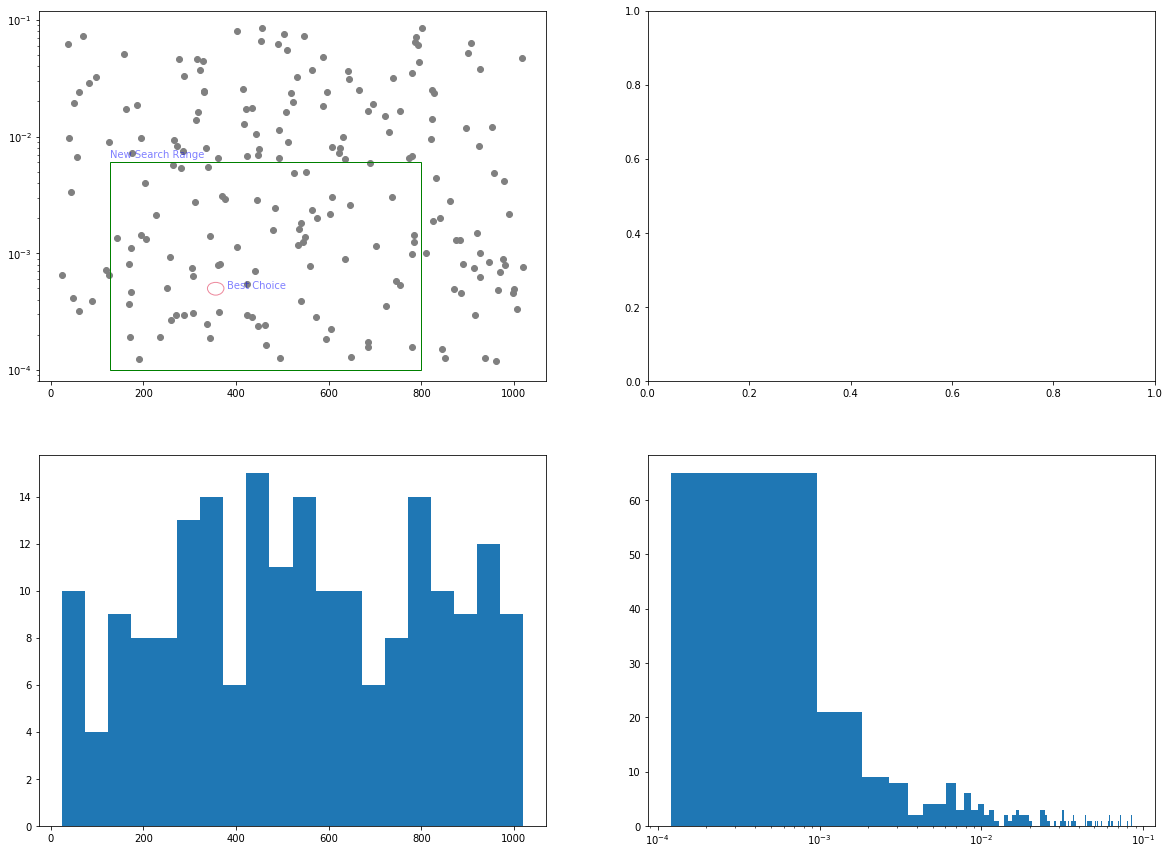

In [126]:

leaning_rate_ = sample_hyperParams(hParam_type ="learning_rate",rng = [-4,-1],sample_size = 200)
minibatch_size_ = sample_hyperParams(hParam_type ="minibatch_size",rng = [16,1024],sample_size = 200)

# plt.style.use('seaborn')
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20,15))
ax[0,0].set_ylim(top = 1.2 * 10e-2, bottom = 0.8 * 10e-5)
ax[0,0].scatter(minibatch_size_,leaning_rate_, color = "gray")
ax[0,0].set_yscale('log')
# ax[0,0].grid()
rec = Rectangle((128,0.0001), 800-128 , 0.006-0.0001, fill=False, edgecolor="green")
ax[0,0].add_patch(rec)

# Add labels to the plot
style = dict(size=10, color='blue', alpha = 0.5)
ax[0,0].text(128, 0.006+0.006*0.1, "New Search Range ", ha='left', **style)

c = Ellipse((356,0.0005),width = 0.1 * 356 ,  height =0.25 * 0.0005, edgecolor='crimson', fill = False, alpha=0.5)
ax[0,0].add_patch(c)
ax[0,0].text(356 + 25, 0.0005 , "Best Choice ", ha='left', **style)


num_mini_batch = ax[1,0].hist(minibatch_size_, bins = 20)

num_alpha = ax[1,1].hist(leaning_rate_, bins = 100)
ax[1,1].set_xscale('log') #changing the scale to log scale to plot learning rate which is in log scale
plt.show()


In [128]:
c = [0.90469, 0.95724, 0.98351, 0.93557, 0.92510, 0.93944, 0.99800, 0.91968]
l = [0.00022, 0.00002, 0.00001, 0.00022, 0.00533, 0.00202, 0.00028, 0.00013]
m = [725, 175, 613, 1625, 910, 1868, 2084, 1170]

sorted_c = [b[1] for b in sorted(enumerate(c),key=lambda i:i[1], reverse = True)]
orig_sorted_c_index = [b[0] for b in sorted(enumerate(c),key=lambda i:i[1], reverse = True)]
# print(sorted_c)
print(orig_sorted_c_index)

print([c[i] for i in orig_sorted_c_index[:6]])

print([l[i] for i in orig_sorted_c_index])
print([m[i] for i in orig_sorted_c_index])


[6, 2, 1, 5, 3, 4, 7, 0]
[0.998, 0.98351, 0.95724, 0.93944, 0.93557, 0.9251]
[0.00028, 1e-05, 2e-05, 0.00202, 0.00022, 0.00533, 0.00013, 0.00022]
[2084, 613, 175, 1868, 1625, 910, 1170, 725]


In [190]:
def calculate_new_search_space(score, samples, score_threshold = 0, summary = True):
    learning_rate = samples["learning_rate"]
    minibatch_size = samples["minibatch_size"]
    
    good_lrs = []
    good_mbs = []
    good_scs = []
    
    if score_threshold == 0:
        top_val = 10
        #if threshold = 0 use the top 10(top_val) best accuracy and their corresponding hyper parameters
        sorted_score_index = [b[0] for b in sorted(enumerate(score),key=lambda i:i[1], reverse = True)]
        good_lrs = [learning_rate[i] for i in sorted_score_index[:top_val]]
        good_mbs = [minibatch_size[i] for i in sorted_score_index[:top_val]]
        good_scs = [score[i] for i in sorted_score_index[:top_val]]
    else:
        #getting the score above the threshold and along with their corresponding hyper parameters
        for ind, val in enumerate(score):
            if val > threshold:
                good_lrs.append(learning_rate[ind])
                good_mbs.append(minibatch_size[ind])
                good_scs.append(val)
            
    if len(good_scs) > 1:  
        
        if summary == True:
            print("+================+===============+================+")
            print("| Validation Acc | Learning Rate | Minibatch Size |")
            print("+================+===============+================+")

            for ind,sc in enumerate(good_scs):
                print("| %.5f\t | %.5f\t | %d\t\t  |"%(sc, good_lrs[ind], good_mbs[ind]))

            print("+================+===============+================+")
        
        #calculating the new search range in log form after expanding the learning rate space by 10%
        lr_rng_new = [np.log10(0.9 * min(good_lrs) ), np.log10(1.1 * max(good_lrs))] 

        #calculating the new search range for minibatch size by expanding the search space by 10%
        mbs_rng_new = [0.9 * min(good_mbs), 1.1 * max(good_mbs)] 
        
    else:
        print("No accuracy or only one accuracy beyond threshold was obtained, so range was calculated based on the best score")
        max_lr = learning_rate[np.argmax(score)] 
        
        #calculating the new search range in log form  from the learning rate of best score, expanding by 50 % in each direction
        lr_rng_new = [np.log10(0.5 * max_lr), np.log10(1.5 * max_lr)] #calculating the range in log scale
        
        max_mbs = minibatch_size[np.argmax(score)]
        
        #calculating the new search range from the minibatch size of best score, expanding by 25 % in each direction
        mbs_rng_new = [0.75 * max_mbs, 1.25 * max_mbs] #calculaing the range
        
        
        
    #best hyper parameter combinations
    best_comb = [np.max(score),learning_rate[np.argmax(score)],minibatch_size[np.argmax(score)]]

    if summary == True:
       
        print("New Search Space for Learning Rate: [%.6f,%.6f]"%(10 ** lr_rng_new[0], 10 ** lr_rng_new[1]))
        print("New Search Space for Minibatch Size: [%d,%d]"%(mbs_rng_new[0], mbs_rng_new[1]))
        print("Best Score: %.6f "%(best_comb[0]))
        print("Best Hyper Params:\n Learning Rate: %.6f\n Minibatch Size: %d"%(best_comb[1], best_comb[2]))
  
    
    return lr_rng_new, mbs_rng_new, best_comb


In [176]:
sc = np.random.uniform(0,1,100)

lr = []
for i in range(100):
    r = np.random.uniform(-5, -1)
    p = 10 ** r
    lr.append(p)
    
mbz = np.random.randint(50,2200,100)

samples = {"learning_rate": lr,
               "minibatch_size" : mbz}
score_threshold = 0


lr_rng, mbs_rng, best = calculate_new_search_space(sc,samples,score_threshold, summary = True)

+================+===============+================+
| Validation Acc | Learning Rate | Minibatch Size |
+================+===============+================+
| 0.99074	 | 0.00016	 | 188		  |
| 0.98503	 | 0.04477	 | 488		  |
| 0.94398	 | 0.00021	 | 1756		  |
| 0.94354	 | 0.02226	 | 961		  |
| 0.94024	 | 0.00867	 | 1766		  |
| 0.93848	 | 0.00015	 | 385		  |
| 0.93221	 | 0.05385	 | 1362		  |
| 0.90982	 | 0.00001	 | 1919		  |
| 0.89278	 | 0.00007	 | 211		  |
| 0.88596	 | 0.04494	 | 741		  |
+================+===============+================+
New Search Space for Learning Rate: [0.000010,0.059238]
New Search Space for Minibatch Size: [169,2110]
Best Score: 0.990737 
Best Hyper Params:
 Learning Rate: 0.000156
 Minibatch Size: 188


In [146]:
def visualize_search(samples,score, lr_rng_new, mbs_rng_new, best_comb):
    
    learning_rate = samples["learning_rate"]
    minibatch_size = samples["minibatch_size"]
    lr_min = 10 ** lr_rng_new[0]
    lr_max = 10 ** lr_rng_new[1]
    
    # plt.style.use('seaborn')
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10,7))
    ax.set_ylim(top = 10e-2, bottom = 10e-5)
    
    ax.scatter(minibatch_size,learning_rate, color = "gray",alpha=0.80)
    ax.set_yscale('log')
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    rec = Rectangle((mbs_rng_new[0], lr_min), mbs_rng_new[1] - mbs_rng_new[0], lr_max - lr_min, fill=False, edgecolor="green")
    ax.add_patch(rec)

    c = Ellipse((best_comb[2],best_comb[1]),width = 30,  height =0.30 * best_comb[1], edgecolor='green', fill = False, alpha=0.5)
    ax.add_patch(c)
    ax.scatter(best_comb[2],best_comb[1], color = "crimson",alpha=1)


    # Add labels to the plot
    style = dict(size=10, color='blue', alpha = 0.8)
    ax.text(mbs_rng_new[0], lr_max + 0.1*lr_max, "New Search Range ", ha='left', **style)
    ax.text(best_comb[2] + 25, best_comb[1] , "Best Choice ", ha='left', **style)

    
    plt.show()


+================+===============+================+
| Validation Acc | Learning Rate | Minibatch Size |
+================+===============+================+
| 0.97608	 | 0.06276	 | 44		  |
| 0.97792	 | 0.00241	 | 989		  |
+================+===============+================+
New Search Space for Learning Rate: [0.002166,0.069034]
New Search Space for Minibatch Size: [39,1087]
Best Score: 0.977921 
Best Hyper Params:
 Learning Rate: 0.002407
 Minibatch Size: 989


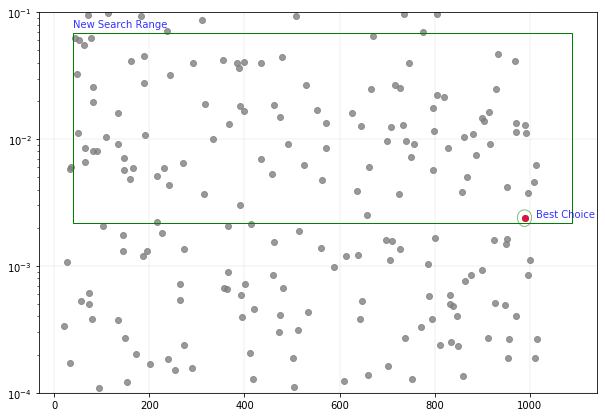

In [185]:
sc = np.random.uniform(0,.98,200)

lr = []
for i in range(200):
    r = np.random.uniform(-4, -1)
    p = 10 ** r
    lr.append(p)
    
mbz = np.random.randint(16,1024,200)

samples = {"learning_rate": lr,
               "minibatch_size" : mbz}
score_threshold = 0.97

lr_rng, mbs_rng, best = calculate_new_search_space(sc, samples, score_threshold, summary = True)

visualize_search(samples,sc, lr_rng, mbs_rng, best)

In [194]:
#Coarse search with 2 epoch, fine search with 5 epoch and detailed search with 10 epoch

def random_search_2D(param1, param2, search_type ="coarse", evaluate_metric = "accuracy", sample_size = 100, search_summary = True, search_visualization = True):
    
    #accessing the input parameter types and their range
    hParam_type1 = param1["hParam type"]
    hParam_range1 = param1["hParam range"]
    
    hParam_type2 = param2["hParam type"]
    hParam_range2 = param2["hParam range"]
    
    samples = {} #for storing the generated samples
    
    #checking the search type
    if search_type == "coarse":
        epoch_size = 2
        score_threshold = 0.95
    elif search_type == "fine":
        epoch_size = 5
        score_threshold = 0.97
    elif search_type == "detail":
        epoch_size = 10
        score_threshold = 0.99
    else:
        raise ValueError("Search Type not identified. Must be 'coarse', 'fine', or 'detail'")
    
    #generating Samples for two input parameters
    samples[hParam_type1] = sample_hyperParams(hParam_type = hParam_type1, rng = hParam_range1, sample_size = sample_size)
    samples[hParam_type2] = sample_hyperParams(hParam_type = hParam_type2,rng = hParam_range2, sample_size = sample_size)
    
            
    if hParam_type1 == "learning_rate":
        leaning_rate_samples =  samples[hParam_type1]
    elif hParam_type2 == "learning_rate":
        leaning_rate_samples =  samples[hParam_type2]
    

    if hParam_type2 == "minibatch_size":
        minibatch_size_samples =  samples[hParam_type2]
    elif hParam_type1 == "minibatch_size":
        minibatch_size_samples =  samples[hParam_type2]
    
        
    score = []
    
    toc = time.time()
        
    for i in range(sample_size):
        print("\nSample: %d/%d -- Learning Rate: %.6f | Minibatch Size: %d"%(i+1,sample_size,leaning_rate_samples[i],minibatch_size_samples[i]))
        print("==========================================================================================================")
        
        hyperParams = init_hyperParams(alpha = leaning_rate_samples[i], num_epoch = epoch_size, mini_batch_size = minibatch_size_samples[i])
        
        parameters = train(train_x_norm, train_y_encoded, dev_x_norm, dev_y_encoded,layers_dim, hyperParams, initialization = "he", optimizer = 'adam', visualize = False) 
        
        if evaluate_metric == "accuracy":
            prediction_dev,dev_acc, _ = predict(dev_x_norm, dev_y_encoded,parameters)
            score.append(dev_acc)

        elif evaluate_metric == "f1-score": 
            pass

        else:
            raise ValueError("Metric must be 'accuracy' or 'f1-score'")
        
    print("==========================================================================================================")
    
    tic = time.time() # for calculating entire search time
    hrs, mins, secs , ms = convert_time((tic - toc)*1000)
    
    print("\n\n*************************** Total Search Time = %dhr %dmins %dsecs %.2fms ***************************\n\n"%(hrs, mins, secs, ms))
    
    assert(len(score) == sample_size)
    
    
    
    if search_summary == True:
        print(search_type.capitalize()+" Search Summary: \n")
    
    lr_rng_new, mbs_rng_new, best_comb = calculate_new_search_space(score, samples, score_threshold=0 , summary = search_summary)
    
    if search_visualization == True:
#         pass
        visualize_search(samples,score,lr_rng_new, mbs_rng_new, best_comb)
    
    return lr_rng_new, mbs_rng_new, best_comb


Sample: 1/20 -- Learning Rate: 0.000127 | Minibatch Size: 334

Epoch: 1/1
15000/15000 [==========> 100%] - 17.78s | loss: 0.6694 | acc: 0.8528 | Val loss: 0.6374 | Val acc: 0.8744 

*************************** Total Training Time = 0hr 0mins 17secs 811.42ms ***************************

Sample: 2/20 -- Learning Rate: 0.049575 | Minibatch Size: 733

Epoch: 1/1
15000/15000 [==========> 100%] - 9.59s | loss: 0.6444 | acc: 0.8265 | Val loss: 0.6815 | Val acc: 0.8264 

*************************** Total Training Time = 0hr 0mins 9secs 612.26ms ***************************

Sample: 3/20 -- Learning Rate: 0.098714 | Minibatch Size: 711

Epoch: 1/1
15000/15000 [==========> 100%] - 9.68s | loss: nan | acc: 0.0977 | Val loss: nan | Val acc: 0.0840 

*************************** Total Training Time = 0hr 0mins 9secs 710.41ms ***************************

Sample: 4/20 -- Learning Rate: 0.001444 | Minibatch Size: 845

Epoch: 1/1
15000/15000 [==========> 100%] - 9.02s | loss: 0.2914 | acc: 0.9157 | Val 

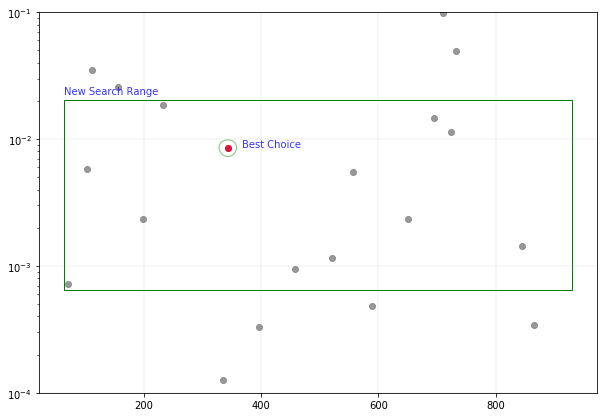

In [193]:
#Coarse Random Search
lr_rng_coarse = [-4,-1]
mbs_rng_coarse = [16,1024]

param1_coarse = {"hParam type": "learning_rate" ,
          "hParam range": lr_rng_coarse }
    
param2_coarse = {"hParam type": "minibatch_size",
          "hParam range": mbs_rng_coarse } 
    
lr_rng_fine, mbs_rng_fine, best_comb = random_search_2D(param1 = param1_coarse, param2 = param2_coarse , search_type ="coarse", evaluate_metric = "accuracy", sample_size = 20, search_summary = True, search_visualization = True)


In [ ]:
#Fine Random Search

param1_fine = {"hParam type": "learning_rate" ,
          "hParam range": lr_rng_fine }
    
param2_fine = {"hParam type": "minibatch_size",
          "hParam range": mbs_rng_fine } 
    
lr_rng_detail, mbs_rng_detail, best_comb = random_search_2D(param1 = param1_fine, param2 = param2_fine , search_type ="fine", evaluate_metric = "val_acc", sample_size = 100, summary = True)


In [ ]:
#Detail Random Search

param1_detail = {"hParam type": "learning_rate" ,
          "hParam range": lr_rng_detail }
    
param2_detail = {"hParam type": "minibatch_size",
          "hParam range": mbs_rng_detail } 
    
lr_rng_fine, mbs_rng_fine, best_comb = random_search_2D(param1 = param1_detail, param2 = param2_detail , search_type ="detail", evaluate_metric = "val_acc", sample_size = 50, summary = True)


In [ ]:
print(score)
print(np.where(score == np.max(score)))

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
im = plt.imshow(score,cmap="RdYlGn") #RdYlGn, PiYG, Accent,Blues,viridis, YlGnBu
fig.colorbar(im,ax=ax,fraction=0.045)

m = len(lr)
n = len(mbz)
    
ax.set_title("Result of Grid Search",fontsize=24,pad = 20)
ax.set_xticks(range(0,m))
ax.set_yticks(range(0,n))
ax.set_xlabel("Learning Rate", fontsize = 20)
ax.set_ylabel("Minibatch Size", fontsize = 20)

ax.set_xticklabels(lr,fontsize=16,rotation=45)
ax.set_yticklabels(mbz,fontsize=16)

#setting horizontal axes labeling to top.
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')


# Turn off all the ticks
ax.tick_params(top=False,left=False)


thres = [0.88, 0.96]

for i in range(n):
    for j in range(m):
        ax.text(j, i, "%.4f"%(score[i, j]),
                       ha="center", va="center", color="w" if score[i,j] > thres[1] or score[i,j] < thres[0]  else "black")


fig.tight_layout()
plt.show()


In [ ]:
cm_train = confusion_matrix(train_y_sample,prediction_train)

cm_dev = confusion_matrix(dev_y_sample,prediction_dev)

cm_test = confusion_matrix(test_y_sample,prediction_test)

In [ ]:
metrics, macro_metrics, acc = model_metrics(cm_train)

In [ ]:
save_model(file_name = "hyperParameters", parameters = hyper_params)

In [ ]:
loaded_hyper_params = load_model(file_name = "final_model_adam_dropout")

In [ ]:
for key,value in loaded_hyper_params.items():
    print(key + ": " + str(value))